In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
table=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
table.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [3]:
stock_list = table['Symbol'].to_list()
stock_list[0:]

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ATVI',
 'ADM',
 'ADBE',
 'ADP',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AMD',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BBWI',
 'BAX',
 'BDX',
 'WRB',
 'BRK.B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF.B',
 'BG',
 'CHRW',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CDAY',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',

In [4]:
df =yf.download(stock_list,  start = "2022-01-04" , end = "2022-05-20")
df.head() 

[*********************100%***********************]  503 of 503 completed

3 Failed downloads:
- BF.B: No data found for this date range, symbol may be delisted
- GEHC: Data doesn't exist for startDate = 1641272400, endDate = 1653019200
- BRK.B: No timezone found, symbol may be delisted


Adj Close                                     \
                              A        AAL         AAP        AAPL   
Date                                                                 
2022-01-04 00:00:00  149.957443  19.020000  225.983444  178.390701   
2022-01-05 00:00:00  147.388580  18.680000  225.411469  173.645538   
2022-01-06 00:00:00  147.904327  18.570000  230.368698  170.746811   
2022-01-07 00:00:00  143.966690  19.280001  226.974915  170.915588   
2022-01-10 00:00:00  143.976624  18.790001  223.199783  170.935440   

                                                                    \
                           ABBV         ABC         ABT       ACGL   
Date                                                                 
2022-01-04 00:00:00  127.691864  129.333130  132.266479  45.130001   
2022-01-05 00:00:00  128.362610  130.455551  131.672226  44.599998   
2022-01-06 00:00:00  127.757980  128.437180  131.652725  44.860001   
2022-01-07 00:00:00  127.427322  131.065964  132.061874  45.070000   
2022-01-10 00:00:00  128.853882  132.562500  131.769608  46.020000   

                                             ...   Volume                     \
                            ACN        ADBE  ...     WYNN      XEL       XOM   
Date                                         ...                               
2022-01-04 00:00:00  395.679962  554.000000  ...  2292300  4197000  38584000   
2022-01-05 00:00:00  388.711731  514.429993  ...  3439900  4166000  34033300   
2022-01-06 00:00:00  369.940704  514.119995  ...  2583200  2296000  30668500   
2022-01-07 00:00:00  362.845276  510.700012  ...  1720400  2673100  23985400   
2022-01-10 00:00:00  365.047302  525.830017  ...  3340000  3760600  22760300   

                                                                          \
                        XRAY      XYL      YUM      ZBH    ZBRA     ZION   
Date                                                                       
2022-01-04 00:00:00  1438200   925400   935900  1400800  346000  1355900   
2022-01-05 00:00:00  1264600  1090200   977900  1895715  403700  1113800   
2022-01-06 00:00:00  1986600   703400   862400  1088813  338300  1439600   
2022-01-07 00:00:00  1239100   765000   833700  1690230  432800  1289200   
2022-01-10 00:00:00  1500100  1062700  1606900  1942065  403400  1577900   

                              
                         ZTS  
Date                          
2022-01-04 00:00:00  4664000  
2022-01-05 00:00:00  4749400  
2022-01-06 00:00:00  3103400  
2022-01-07 00:00:00  2206500  
2022-01-10 00:00:00  2232200  

[5 rows x 3018 columns]

In [5]:
list(df.columns.levels[0])

['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']

Feature Engineering

In [6]:
returns = round(((df['Adj Close'].iloc[-1,:] - df['Adj Close'].iloc[1,:]) / df['Adj Close'].iloc[1,:]), 2)
df2 = pd.DataFrame(returns)
df2.rename(columns = {0 : 'Returns'}, inplace = True)

In [7]:
df2['Std'] = round(df['Adj Close'].std(), 2)

In [8]:
df2['Range'] = round((df['High'] - df['Low']).mean(), 2)

In [9]:
df2.reset_index(inplace=True)

In [10]:
df2.rename(columns = {"index": "Symbol", 0 : 'Returns %'}, inplace = True)
df2.head()

,Symbol,Returns,Std,Range
0,A,-0.18,8.61,3.93
1,AAL,-0.10,1.52,0.84
2,AAP,-0.16,11.78,6.51
3,AAPL,-0.21,8.90,4.56
4,ABBV,0.14,10.18,3.35


Elbow Method

In [11]:
df2[pd.isnull(df2).any(axis=1)]

,Symbol,Returns,Std,Range
61,BF.B,NaN,NaN,NaN
71,BRK.B,NaN,NaN,NaN
90,CEG,NaN,6.6,2.93
200,GEHC,NaN,NaN,NaN


In [12]:
df2 = df2.drop([df2.index[61] , df2.index[71], df2.index[90], df2.index[200]])

In [13]:
df2.isnull().sum()

Symbol     0
Returns    0
Std        0
Range      0
dtype: int64

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df2[['Returns']])
df2['Returns'] = scaler.transform(df2[['Returns']])
scaler.fit(df2[['Std']])
df2['Std'] = scaler.transform(df2[['Std']])
scaler.fit(df2[['Range']])
df2['Range'] = scaler.transform(df2[['Range']])

In [15]:
X = df2[['Returns', 'Std', 'Range']].values

In [16]:
sse = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k) 
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

In [17]:
sse

[6.177842926423902,
 4.319872540109733,
 3.0743862541782865,
 2.2876138631424507,
 1.6805960382328393,
 1.3802079752039118,
 1.1628944058996746,
 0.9925298370680252]

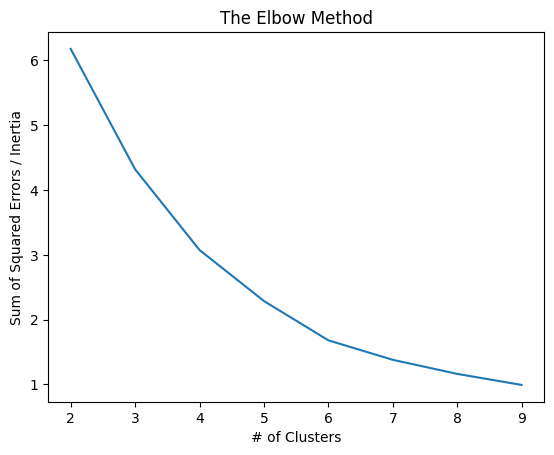

In [18]:
plt.plot(range(2,10), sse)
plt.title('The Elbow Method')
plt.xlabel('# of Clusters')
plt.ylabel('Sum of Squared Errors / Inertia')
plt.show()

In [19]:
km = KMeans(n_clusters = 6)
y_predicted = km.fit_predict(X)
y_predicted

array([1, 1, 1, 1, 2, 2, 1, 2, 5, 5, 1, 2, 1, 5, 2, 2, 1, 1, 2, 2, 2, 1,
       2, 5, 1, 2, 1, 5, 2, 5, 1, 2, 1, 1, 5, 1, 5, 1, 5, 0, 1, 1, 5, 1,
       2, 2, 1, 1, 1, 1, 5, 1, 3, 5, 1, 1, 1, 5, 5, 2, 1, 2, 1, 5, 1, 3,
       0, 5, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 5, 5, 1, 1, 1,
       0, 1, 1, 1, 5, 2, 2, 1, 1, 1, 1, 1, 3, 1, 2, 2, 2, 1, 1, 0, 5, 2,
       1, 1, 5, 5, 5, 1, 1, 1, 1, 0, 1, 2, 1, 0, 5, 2, 2, 1, 2, 1, 1, 1,
       5, 1, 5, 5, 1, 2, 5, 2, 5, 1, 2, 2, 1, 0, 1, 5, 2, 5, 5, 2, 5, 2,
       5, 2, 1, 1, 2, 0, 5, 5, 1, 0, 2, 1, 1, 2, 5, 2, 1, 2, 1, 5, 1, 5,
       2, 1, 1, 1, 1, 2, 5, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 2, 1, 5, 5, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 5, 0, 2, 2, 1,
       2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 5, 5, 1, 1, 5, 2, 1, 5, 1, 2, 1,
       1, 1, 2, 5, 1, 1, 1, 2, 1, 5, 2, 2, 1, 5, 2, 1, 1, 5, 2, 1, 1, 1,
       2, 1, 2, 2, 2, 2, 5, 1, 2, 1, 1, 2, 2, 1, 2, 5, 5, 2, 1, 2, 2, 1,
       1, 1, 2, 1, 1, 1, 0, 5, 1, 2, 2, 5, 1, 1, 1,

In [20]:
df2['Cluster'] = y_predicted
df2.head()

,Symbol,Returns,Std,Range,Cluster
0,A,0.294118,0.018433,0.022637,1
1,AAL,0.341176,0.002378,0.003473,1
2,AAP,0.305882,0.025611,0.038638,1
3,AAPL,0.276471,0.019089,0.026544,1
4,ABBV,0.482353,0.021988,0.019040,2


In [21]:
df2['Cluster'].value_counts()

1    233
2    138
5    102
0     21
3      4
4      1
Name: Cluster, dtype: int64

We can see that clusters 1, 2, and 5 contain the most symbols. Clusters 4 and 3 are two distinct clusters with a small number of symbols each.

In [25]:
df2.loc[df2['Cluster'] == 3]

,Symbol,Returns,Std,Range,Cluster
52,AZO,0.358824,0.234732,0.351712,3
66,BKNG,0.323529,0.411064,0.516063,3
103,CMG,0.282353,0.218043,0.344704,3
324,MTD,0.264706,0.222436,0.274498,3


In [24]:
df2.loc[df2['Cluster'] == 4]

,Symbol,Returns,Std,Range,Cluster
342,NVR,0.241176,1.0,1.0,4


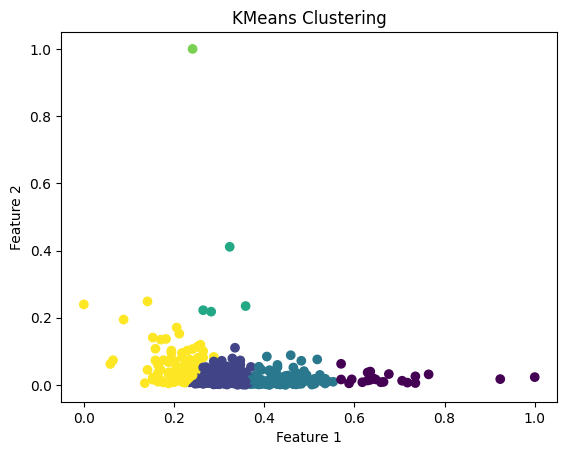

In [26]:
import matplotlib.pyplot as plt

# Assume X is your data and y_predicted is the predicted cluster labels
# You can use the first two columns of X to plot the data points
x = X[:, 0]
y = X[:, 1]

# Create a scatter plot with a different color for each cluster
plt.scatter(x, y, c=y_predicted, cmap='viridis')
plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
